In [3]:
import numpy as np
import load_from_snapshot
import h5py
from matplotlib import pyplot as plt
import matplotlib.cm as cm
import pickle

In [ ]:
for n in range(1): #Sets how many simulations to pickle, still nee
    simNumber='00'+str(n);
    if (n>=10): ext='0'+str(n)                                     #This resolves naming issues
    if (n>=100): ext=str(n)
    datafolder = "/home/hlane/gizmo-public/custom/gmc_MHD" + simNumber + "/output"
    timeList = []
    rhoList = []
    dict = {} #init the empty dictionary
    for i in range(751): #Sets how many snapshots per simulation
        ext='00'+str(i);
        if (i>=10): ext='0'+str(i)                                     #This resolves naming issues
        if (i>=100): ext=str(i)
        f = h5py.File(datafolder + "/snapshot_" + ext + ".hdf5", "r")  #opens file
        try:
            rho = np.float64(np.array(f["PartType0"]["Density"]))
            rhoList.append(rho)
            time = load_from_snapshot.load_from_snapshot("Time",0,datafolder,i)
            timeList.append(time)
            dict[i] = [rhoList, timeList] #assign values for directories
            F = open('pickle/filename' + simNumber + '.pickle','wb')
            pickle.dump(dict[i], F)
            F.close()
        except:
            print("Failed to write to file.")

In [ ]:
print(rhoList)

In [16]:
i = 100 #Snapshot identifier
#Need to add simulation id
import pickle
F=open('pickle/filename000.pickle', "rb")
temp = pickle.load(F)
F.close()
rhoList = temp[0]
timeList = temp[1]
print(rhoList[i])
print(timeList[i])

[ 6.66379309 24.29885483 40.04303741 ...  0.60339868  0.7544353
  0.14156666]
0.0013118613355063962


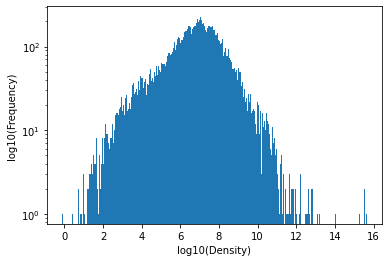

In [20]:
rho_0 = np.mean(rhoList[i])
logRho_0 = np.log(rho_0)
logRho = np.log(rhoList[i])
s = np.log(rhoList[i] * 26)
sigma = np.std(s)
s_0 = np.mean(s)
plt.hist(s, bins = 1000)
plt.xlabel('log10(Density)') 
plt.ylabel('log10(Frequency)')
plt.yscale('log', base = 10)
plt.show()

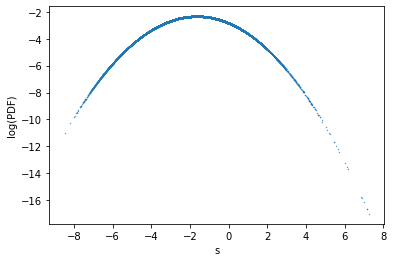

In [18]:
firstHalf = (np.sqrt(2*np.pi*(sigma))**2)**-1
internals = (s - s_0)**2 / (2*(sigma)**2)
secondHalf = np.exp(-1*internals)

pdf = firstHalf * secondHalf
plt.scatter(s, np.log(pdf), marker=".", s = 0.5)
plt.xlabel('s') 
plt.ylabel('log(PDF)')
plt.show()

<ipython-input-21-e28a0dac4006>:3: RuntimeWarning: divide by zero encountered in log10
  log10Frequency = np.log10(frequencies)


Text(0, 0.5, 'Frequency')

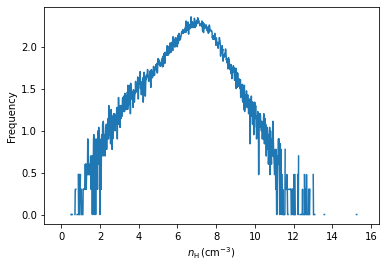

In [21]:
frequencies, edges = np.histogram(s, bins = 1000)
s_centers = np.array((edges[1:]+edges[:-1])/2)
log10Frequency = np.log10(frequencies)
plt.plot(s_centers, log10Frequency)
plt.xlabel(r"$n_{\rm H}\, \rm (cm^{-3}$)")
plt.ylabel('Frequency')

<ipython-input-28-f2f502dd9ec1>:17: RuntimeWarning: divide by zero encountered in log10
  log10Frequency = np.log10(frequencies)


Text(0, 0.5, 'Frequency')

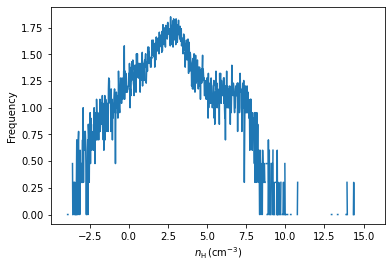

In [28]:
i = 400
import pickle
F=open('pickle/filename000.pickle', "rb")
temp = pickle.load(F)
F.close()
rhoList = temp[0]
timeList = temp[1]
rho_0 = np.mean(rhoList[i])
logRho_0 = np.log(rho_0)
logRho = np.log(rhoList[i])
s = np.log(rhoList[i] * 26)
sigma = np.std(s)
s_0 = np.mean(s)

frequencies, edges = np.histogram(s, bins = 1000)
s_centers = np.array((edges[1:]+edges[:-1])/2)
log10Frequency = np.log10(frequencies)
plt.plot(s_centers, log10Frequency)
plt.xlabel(r"$n_{\rm H}\, \rm (cm^{-3}$)")
plt.ylabel('Frequency')